In [1]:
#importing all the libraries required
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from win10toast import ToastNotifier
from time import sleep

In [2]:
#importing all the datasets used
#df is for the whole country(here the dataset used is for INDIA)
df= pd.read_csv(r'Downloads\IndiaCovid.csv',parse_dates=['Date'])   #till 29.05.2022
#f is for statewise(here the states used are of INDIA)
f= pd.read_csv(r'Desktop\Statewise.csv',parse_dates=['Date'])


In [3]:
print("Cases in INDIA(From 12-March-2020 to 29-June-2022):")
df


Cases in INDIA(From 12-March-2020 to 29-June-2022):


,Date,Confirmed Cases,Cured/Discharged,Death
0,2020-03-12,24,3,0
1,2020-03-13,45,3,1
2,2020-03-14,84,10,2
3,2020-03-15,107,10,2
4,2020-03-16,114,13,2
...,...,...,...,...
774,2022-05-25,43142192,42602714,524520
775,2022-05-26,43144820,42604881,524525
776,2022-05-27,43147530,42607177,524539
777,2022-05-28,43150215,42609335,524585


In [4]:
print("Cases-Statewise:")
f

Cases-Statewise:


,Date,State_Name,Confirmed,Deceased,Recovered
0,2020-03-14,Andaman and Nicobar Islands,0,0,0
1,2020-03-14,Andhra Pradesh,1,0,0
2,2020-03-14,Arunachal Pradesh,0,0,0
3,2020-03-14,Assam,0,0,0
4,2020-03-14,Bihar,0,0,0
...,...,...,...,...,...
5397,2020-08-06,Telangana,2092,13,1289
5398,2020-08-06,Tripura,98,1,68
5399,2020-08-06,Uttar Pradesh,4586,61,2844
5400,2020-08-06,Uttarakhand,369,4,194


In [5]:
States= f['State_Name'].tolist()

#print("the list of a single column from the dataframe\n",States,type(States))
res = []
for i in States:
    if i not in res:
        res.append(i)
  
# printing list after removal 
print ("The list after removing duplicates : " + str(res))

The list after removing duplicates : ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [6]:
print("The states are:")
for i in res:
    print(i)

The states are:
Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli and Daman and Diu
Daman and Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Tripura
Uttar Pradesh
Uttarakhand
West Bengal


The graph for confirmed cases vs date in Gregorian Ordinal


<AxesSubplot:xlabel='date', ylabel='confirmed'>

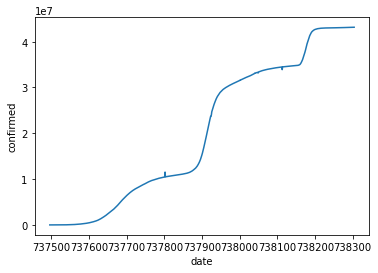

In [7]:
#Analyzing the data
#converting date into GregorianOrdinal
import datetime as dt
df['Date']=df['Date'].map(dt.datetime.toordinal)
df.columns=['date','confirmed','cured','death']
print("The graph for confirmed cases vs date in Gregorian Ordinal")
sns.lineplot(x='date',y='confirmed',data=df)


The barplot for COVID-19 in INDIA from 2020-2022 is:


<AxesSubplot:xlabel='date', ylabel='confirmed'>

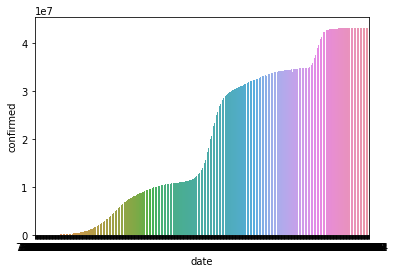

In [8]:
print("The barplot for COVID-19 in INDIA from 2020-2022 is:")
sns.barplot(x='date',y='confirmed',data=df)



In [9]:
#USING METHOD1:LINEAR REGRESSION
#Dividing training and testing data into 0.8:0.2 ratio
from sklearn.model_selection import train_test_split
X_Axis=df['date']
Y_Axis=df['confirmed']
XTraining,XTesting,YTraining,YTesting=train_test_split(X_Axis,Y_Axis,test_size=0.2)


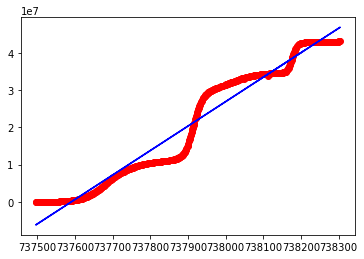

In [10]:
#METHOD 1: LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lra=LinearRegression(fit_intercept=True)
lra.fit(np.array(XTraining).reshape(-1,1),np.array(YTraining).reshape(-1,1))
df.sort_values(by='confirmed',ascending=False)
plt.scatter(XTraining,YTraining,color="red")
YpredictTraining=lra.predict(np.array(XTraining).reshape(-1,1))
plt.plot(XTraining,lra.predict(np.array(XTraining).reshape(-1,1)), color='blue')
    

In [11]:
print("Linear Regression to predict Number of cases:")
print("For the line Y=mX+c")
print("Best fit Coefficient m:",lra.coef_)
print("Best fit Intercept c",lra.intercept_)

Linear Regression to predict Number of cases:
For the line Y=mX+c
Best fit Coefficient m: [[65848.51019409]]
Best fit Intercept c [-4.85692408e+10]


In [12]:
XTraining

574    738085
633    738152
621    738140
70     737566
133    737629
        ...  
387    737891
372    737876
598    738111
142    737638
686    738206
Name: date, Length: 623, dtype: int64

In [13]:
#Variables for testing data
Ypredicttesting=lra.predict(np.array(XTesting).reshape(-1,1))

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(YTesting, Ypredicttesting)
def error():
    from sklearn.metrics import r2_score
    from math import sqrt
    print("R2 error for testing data of LINEAR REGRESSION")
    r2 = r2_score(YTesting, Ypredicttesting)
    print('\nR2 =', r2)

In [15]:
error()

R2 error for testing data of LINEAR REGRESSION

R2 = 0.9622031633597496


In [16]:
#PREDICTION OF NUMBER OF CONFIRMED CASES FOR NEXT 1 WEEK
Value=input("Enter a date in format YYYY-MM-DD")
from datetime import datetime
ordinalvalue = dt.datetime.strptime(Value, '%Y-%m-%d').date()
o=ordinalvalue.toordinal()
print(o)
if o>=737504:
    print('Predicted Number Of Cases[cumulative] in INDIA using LINEAR REGRESSION for next 7 days from',Value,'are:')
    sum=0
    days=0
    min=0
    max=0
    for k in range(0,7):
        Predict2=lra.predict(np.array(o+k).reshape(-1,1))
    
        if Predict2<0:
        
            print(k+1,':','cases can range from 0 -','any value less or near to',k+2,"day of the week")
        elif Predict2>0:    
            print(k+1,':',Predict2)
            sum+=Predict2
            days=days+1
            if max<Predict2:
                max=Predict2
            if min==0 :
                min=Predict2
            elif min>Predict2:
                min=Predict2
           
            
    print("Approximate Daily Cumulative:",sum/days)
    print("MINIMUM OF THE WEEK:",min)
    print("MAXIMUM OF THE WEEK:",max)
    print("THE MAXIMUM CASES CAN LIE BETWEEN THE RANGE:",min,'-',max," OR EVEN MORE IF COVID-19 GUIDELINES ARE NOT FOLLOWED AND THE SPREAD IS NOT STOPPED")
else:
    print("CORONAVIRUS OUTBREAK DID NOT START TILL THIS DATE, ENTER A CORRECT DATE FOR FORECAST")


Enter a date in format YYYY-MM-DD2021-12-01
738125
Predicted Number Of Cases[cumulative] in INDIA using LINEAR REGRESSION for next 7 days from 2021-12-01 are:
1 : [[35190766.44007874]]
2 : [[35256614.95027161]]
3 : [[35322463.46046448]]
4 : [[35388311.97065735]]
5 : [[35454160.48085022]]
6 : [[35520008.99104309]]
7 : [[35585857.50124359]]
Approximate Daily Cumulative: [[35388311.97065844]]
MINIMUM OF THE WEEK: [[35190766.44007874]]
MAXIMUM OF THE WEEK: [[35585857.50124359]]
THE MAXIMUM CASES CAN LIE BETWEEN THE RANGE: [[35190766.44007874]] - [[35585857.50124359]]  OR EVEN MORE IF COVID-19 GUIDELINES ARE NOT FOLLOWED AND THE SPREAD IS NOT STOPPED


In [17]:
#METHOD 2: POLYNOMIAL REGRESSION OF 3 DEGREE
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=3)
XColumns=pr.fit_transform(np.array(XTraining).reshape(-1,1))
lr=LinearRegression(fit_intercept=True)
lr.fit(XColumns,YTraining)
pr



PolynomialFeatures(degree=3)

In [18]:

print("Model's coefficients are:",lr.coef_)
print("Model's intercept is:",lr.intercept_)

Model's coefficients are: [ 0.00000000e+00 -1.75431362e-05 -1.29474352e+01  1.17379052e-05]
Model's intercept is: 2333750307316.832


In [19]:
#YPredictTraining=lr.predict(np.sort(XColumns))
#plt.scatter(XTraining,YTraining)
#plt.xlabel("Date")
#plt.ylabel("Confirmed")
#plt.plot(XTraining,YPredictTraining,color='red')

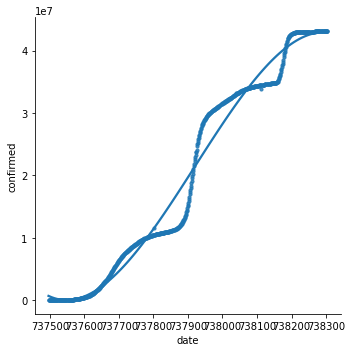

In [20]:
sns.lmplot(x="date", y="confirmed",data=df,
           order=3, ci=None, scatter_kws={"s": 10});

In [21]:
from sklearn.metrics import r2_score
from math import sqrt

XcolumnsTesting=pr.fit_transform(np.array(XTesting).reshape(-1,1))
lr.fit(XcolumnsTesting,YTesting)

YPredicttestingPoly=lr.predict(np.sort(XcolumnsTesting))
R2 = r2_score(YTesting,YPredicttestingPoly)
print("R2 FOR POLYNOMIAL RERESSION'S TESTING DATA")
print('\nR2 =', R2)

R2 FOR POLYNOMIAL RERESSION'S TESTING DATA

R2 = 0.9649600136602514


In [22]:
if R2>0.95:
    print('R2 IS GREATER THAN 0.95 i.e Reliable model')
elif R2<0.95 and R2==0.5:
    print("average model")
else:
    print('Incorrect and inconsistent model')

R2 IS GREATER THAN 0.95 i.e Reliable model


In [23]:
if R2>r2:
    print("HIGHER THE R2 VALUE,BETTER THE MODEL.HENCE,POLYNOMIAL REGRESSION IS MORE ACCURATE,HENCE A BETTER OPTION, THE MODEL IS RELIABLE")
else:
    print("Inconsistent models")

HIGHER THE R2 VALUE,BETTER THE MODEL.HENCE,POLYNOMIAL REGRESSION IS MORE ACCURATE,HENCE A BETTER OPTION, THE MODEL IS RELIABLE


In [24]:
#PREDICTION OF CONFIRMED CASES USING POLYNOMIAL REGRESSION
PredictCases=input("Enter a date in format YYYY-MM-DD")
from datetime import datetime
Dateordinal = dt.datetime.strptime(PredictCases, '%Y-%m-%d').date()
d=Dateordinal.toordinal()
print(d)

print('Predicted Number Of Cases in INDIA USING POLYNOMIAL REGRESSION for next 7 days from',PredictCases,'are:')
for j in range(0,7):
    Prediction12=lr.predict(pr.fit_transform(np.array(d+j).reshape(-1,1)))
    
    if Prediction12<=0:
        
        print('0')
    else:    
        print(j+1,':',Prediction12)

Enter a date in format YYYY-MM-DD2020-12-01
737760
Predicted Number Of Cases in INDIA USING POLYNOMIAL REGRESSION for next 7 days from 2020-12-01 are:
1 : [10732320.51171875]
2 : [10792909.03027344]
3 : [10853530.140625]
4 : [10914183.84667969]
5 : [10974870.14550781]
6 : [11035589.03808594]
7 : [11096340.52441406]


In [25]:
f.tail(1)
today=f[f.Date=="2020-08-06	"]
maxcases=today.sort_values(by='Confirmed',ascending=False)
maxcases.style.background_gradient(cmap='Reds')


,Date,State_Name,Confirmed,Deceased,Recovered
5386,2020-08-06 00:00:00,Maharashtra,11514,316,10854
5366,2020-08-06 00:00:00,Andhra Pradesh,10328,72,8516
5381,2020-08-06 00:00:00,Karnataka,6805,93,5602
5396,2020-08-06 00:00:00,Tamil Nadu,5684,110,6272
5399,2020-08-06 00:00:00,Uttar Pradesh,4586,61,2844
5369,2020-08-06 00:00:00,Bihar,3416,19,1450
5401,2020-08-06 00:00:00,West Bengal,2954,56,2061
5368,2020-08-06 00:00:00,Assam,2372,5,1332
5397,2020-08-06 00:00:00,Telangana,2092,13,1289
5391,2020-08-06 00:00:00,Odisha,1699,11,1150


In [26]:
topstates=maxcases[0:5]
topstates.style.background_gradient(cmap='Blues')

,Date,State_Name,Confirmed,Deceased,Recovered
5386,2020-08-06 00:00:00,Maharashtra,11514,316,10854
5366,2020-08-06 00:00:00,Andhra Pradesh,10328,72,8516
5381,2020-08-06 00:00:00,Karnataka,6805,93,5602
5396,2020-08-06 00:00:00,Tamil Nadu,5684,110,6272
5399,2020-08-06 00:00:00,Uttar Pradesh,4586,61,2844


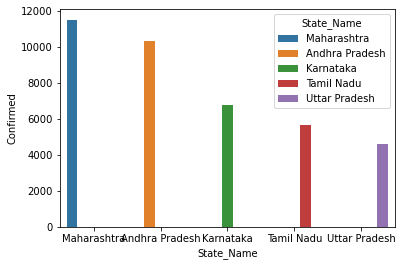

In [27]:
sns.barplot(x='State_Name',y='Confirmed', data=topstates, hue='State_Name')
plt.show()

In [28]:
print(topstates)

           Date      State_Name  Confirmed  Deceased  Recovered
5386 2020-08-06     Maharashtra      11514       316      10854
5366 2020-08-06  Andhra Pradesh      10328        72       8516
5381 2020-08-06       Karnataka       6805        93       5602
5396 2020-08-06      Tamil Nadu       5684       110       6272
5399 2020-08-06   Uttar Pradesh       4586        61       2844


In [29]:
topstates.State_Name

5386       Maharashtra
5366    Andhra Pradesh
5381         Karnataka
5396        Tamil Nadu
5399     Uttar Pradesh
Name: State_Name, dtype: object

In [30]:
States= topstates['State_Name'].tolist()
print(States)

['Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Tamil Nadu', 'Uttar Pradesh']


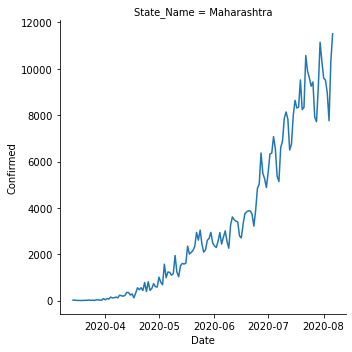

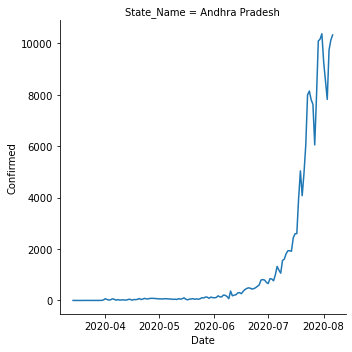

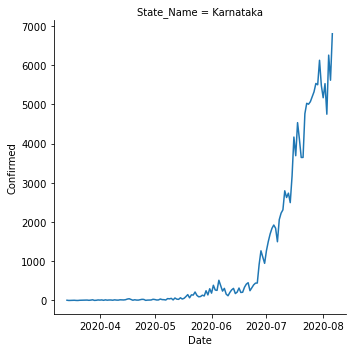

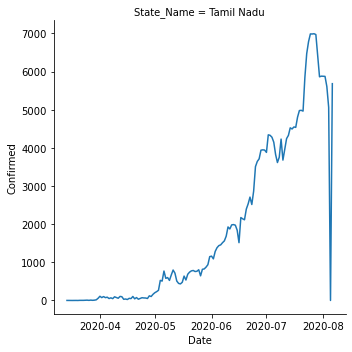

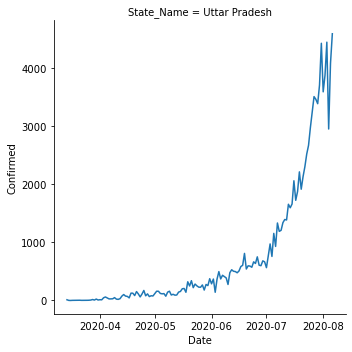

In [31]:
#PLOTS FOR NUMBER OF CONFIRMED CASES FOR TOP 5 STATES WITH MAXIMUM NUMBER OF CASES
for i in States:
    st=f[f.State_Name ==i]
    sns.relplot(x='Date',y='Confirmed',data=st, kind="line", col="State_Name")

linear regression models for top 5 states
Maharashtra [[7941.48634701]]


C:\Users\Lakshay\AppData\Local\Temp/ipykernel_4376/669703659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_4376/669703659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)


Andhra Pradesh [[4492.82591639]]
Karnataka [[3485.25102961]]


C:\Users\Lakshay\AppData\Local\Temp/ipykernel_4376/669703659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_4376/669703659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)


Tamil Nadu [[5058.74783415]]
Uttar Pradesh [[2184.57387087]]


C:\Users\Lakshay\AppData\Local\Temp/ipykernel_4376/669703659.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)


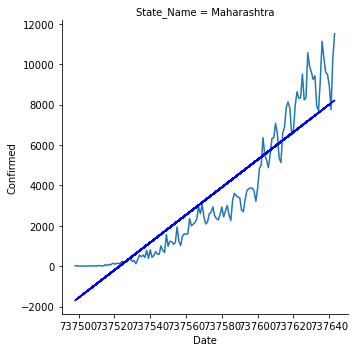

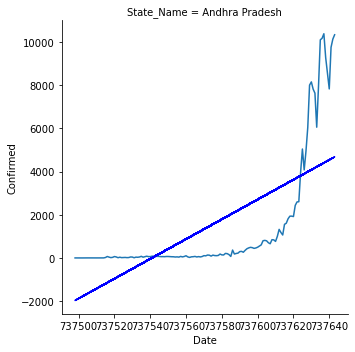

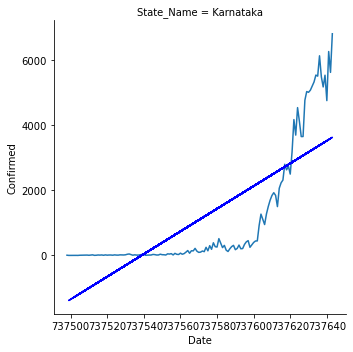

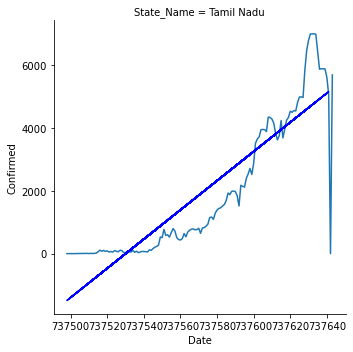

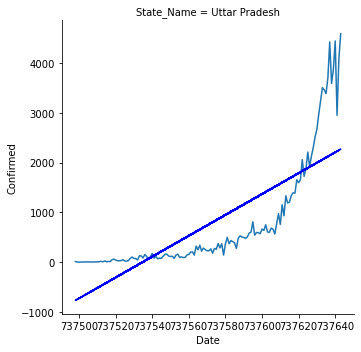

In [36]:
print("linear regression models for top 5 states")
for i in States:
    
    st=f[f.State_Name ==i]
    import datetime as dt
    st['Date']=st['Date'].map(dt.datetime.toordinal)
    from sklearn.model_selection import train_test_split
    x=st['Date']
    y=st['Confirmed']
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    from sklearn.linear_model import LinearRegression
    regressor=LinearRegression(fit_intercept=True)
    regressor.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
    sns.relplot(x='Date',y='Confirmed',data=st, kind="line", col="State_Name")
    Z=plt.plot(X_train,regressor.predict(np.array(X_train).reshape(-1,1)), color='blue')
    ABC=regressor.predict(np.array([[737639]]))
    print(i,ABC)
    

    

In [32]:
for i in States:
    
    st=f[f.State_Name ==i]
    import datetime as dt
    st['Date']=st['Date'].map(dt.datetime.toordinal)
    from sklearn.model_selection import train_test_split
    x=st['Date']
    y=st['Confirmed']
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    from sklearn.linear_model import LinearRegression
    regressor=LinearRegression(fit_intercept=True)
    regressor.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
    #sns.relplot(x='Date',y='Confirmed',data=st, kind="line", col="State_Name")
    #Z=plt.plot(X_train,regressor.predict(np.array(X_train).reshape(-1,1)), color='blue')
    #ABC=regressor.predict(np.array([[757487]]))
    #print(i,ABC)
    


C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/3223460784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/3223460784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/3223460784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [33]:
Value1=input("Enter a date in format YYYY-MM-DD")
from datetime import datetime
ordinalvalue1 = dt.datetime.strptime(Value1, '%Y-%m-%d').date()
oa=ordinalvalue1.toordinal()
print(oa)
if oa>=737504:
    for i in States:
    
        st=f[f.State_Name ==i]
        import datetime as dt
        st['Date']=st['Date'].map(dt.datetime.toordinal)
        from sklearn.model_selection import train_test_split
        x=st['Date']
        y=st['Confirmed']
        X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
        from sklearn.linear_model import LinearRegression
        regressor=LinearRegression(fit_intercept=True)
        regressor.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
        #sns.relplot(x='Date',y='Confirmed',data=st, kind="line", col="State_Name")
        #Z=plt.plot(X_train,regressor.predict(np.array(X_train).reshape(-1,1)), color='blue')
        #ABC=regressor.predict(np.array([[737639]]))
        #print(i,ABC)
    
        #PREDICTION OF NUMBER OF CONFIRMED CASES FOR NEXT 1 WEEK
    
        print("MAXIMUM Predicted Number Of Cases(IF NO GUIDELINES ARE FOLLOWED) in",i, "using LINEAR REGRESSION for next 7 days from",Value1,'are:')
        sum1=0
        days1=0
        for ka in range(0,7):
            Predict1=regressor.predict(np.array(oa+ka).reshape(-1,1))
    
            if Predict1<=0:
        
                print(ka+1,'Somewhere between 0 to a finite number near to next day')
            else:    
                print(ka+1,':',Predict1)
                sum1+=Predict1
                days1=days1+1
                print("Approximately",sum1/days1,"daily")
else:
    print("Coronavirus did not start beyond this date,please enter a valid date to forecast the number of cases")
            



Enter a date in format YYYY-MM-DD2020-12-01
737760
MAXIMUM Predicted Number Of Cases(IF NO GUIDELINES ARE FOLLOWED) in Maharashtra using LINEAR REGRESSION for next 7 days from 2020-12-01 are:
1 : [[17278.04307132]]
Approximately [[17278.04307132]] daily
2 : [[17351.59750246]]
Approximately [[17314.82028689]] daily
3 : [[17425.1519336]]
Approximately [[17351.59750246]] daily
4 : [[17498.70636474]]
Approximately [[17388.37471803]] daily
5 : [[17572.26079588]]
Approximately [[17425.1519336]] daily
6 : [[17645.81522702]]
Approximately [[17461.92914917]] daily
7 : [[17719.36965816]]
Approximately [[17498.70636474]] daily
MAXIMUM Predicted Number Of Cases(IF NO GUIDELINES ARE FOLLOWED) in Andhra Pradesh using LINEAR REGRESSION for next 7 days from 2020-12-01 are:
1 : [[9258.34053848]]
Approximately [[9258.34053848]] daily
2 : [[9300.36169798]]
Approximately [[9279.35111823]] daily
3 : [[9342.38285747]]
Approximately [[9300.36169798]] daily
4 : [[9384.40401696]]
Approximately [[9321.37227772]

C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/2950755556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/2950755556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/2950755556.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor=PolynomialFeatures(degree=3)

In [35]:
X_columns=poly_regressor.fit_transform(np.array(X_train).reshape(-1,1))
regressor=LinearRegression()
regressor.fit(X_columns,y_train)
print("Model's coefficient are:",regressor.coef_)

Model's coefficient are: [ 0.00000000e+00 -5.26658582e-07 -3.63551708e-01  3.28615681e-07]


In [36]:
#y_predict=regressor.predict(poly_regressor.fit_transform(np.array(X_train).reshape(-1,1)))
#plt.scatter(X_train,y_train)
#plt.xlabel("Date")
#plt.ylabel("Confirmed")
#plt.plot(np.sort(X_train),y_predict[np.argsort(X_train)].reshape(-1,1),color='red')

In [37]:
print(" POLYNOMIAL REGRESSION MODEL FOR TOP STATES")
from sklearn.preprocessing import PolynomialFeatures
polyy_regressor=PolynomialFeatures(degree=3)
X_columns=polyy_regressor.fit_transform(np.array(X_train).reshape(-1,1))
regressorr=LinearRegression()
#regressorr.fit(X_columns,y_train)
#print("Model's coefficient are:",regressor.coef_)
for i in States:
    
    st=f[f.State_Name ==i]
    import datetime as dt
    st['Date']=st['Date'].map(dt.datetime.toordinal)
    from sklearn.model_selection import train_test_split
    x111=st['Date']
    y111=st['Confirmed']
    X_train111,X_test111,y_train111,y_test111=train_test_split(x111,y111,test_size=0.2)
    from sklearn.linear_model import LinearRegression
    regressorr=LinearRegression(fit_intercept=True)
    regressorr.fit(np.array(X_train111).reshape(-1,1),np.array(y_train111).reshape(-1,1))
    #sns.relplot(x='Date',y='Confirmed',data=st, kind="line", col="State_Name")
    
    #yapredict=regressor.predict(poly_regressor.fit_transform(np.array(X_train).reshape(-1,1)))
    #plt.plot(np.sort(X_train),yapredict[np.argsort(X_train)].reshape(-1,1),color='red')
    #ABC=regressor.predict(np.array([[737639]]))
    #print(i,ABC)
    #sns.lmplot(x="Date", y="Confirmed",data=st ,order=3, ci=None, scatter_kws={"s": 10});
    


 POLYNOMIAL REGRESSION MODEL FOR TOP STATES


C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/923274380.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/923274380.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/923274380.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Model for state ['Maharashtra', 'Andhra Pradesh', 'Karnataka', 'Tamil Nadu', 'Uttar Pradesh'] is:


C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/1314404919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\anaconda\lib\site-packages\seaborn\regression.py:256: RankWarning: Polyfit may be poorly conditioned
  yhat = reg_func(x, y)
C:\Users\Lakshay\AppData\Local\Temp/ipykernel_5252/1314404919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st['Date']=st['Date'].map(dt.datetime.toordinal)
C:\Users\Lakshay\anaconda\lib\site-packages\

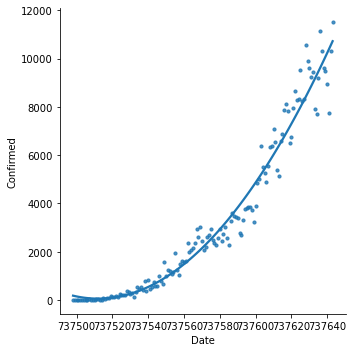

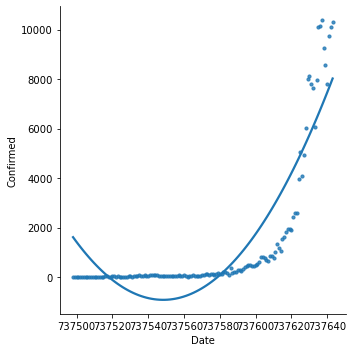

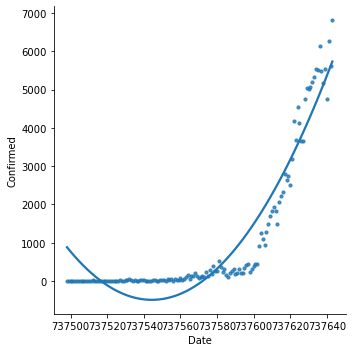

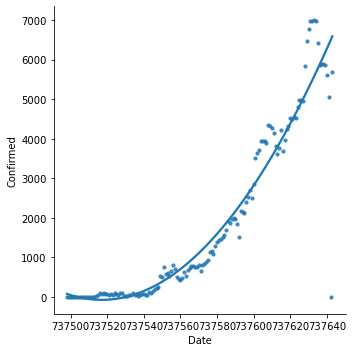

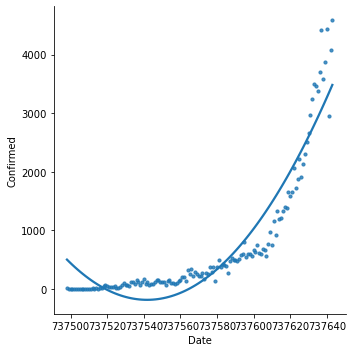

In [38]:
print("Model for state", States , "is:")
for i in States:
    
    st=f[f.State_Name ==i]
    import datetime as dt
    st['Date']=st['Date'].map(dt.datetime.toordinal)
    from sklearn.model_selection import train_test_split
    x111=st['Date']
    y111=st['Confirmed']
    X_train111,X_test111,y_train111,y_test111=train_test_split(x111,y111,test_size=0.2)
    from sklearn.linear_model import LinearRegression
    regressorr=LinearRegression(fit_intercept=True)
    regressorr.fit(np.array(X_train111).reshape(-1,1),np.array(y_train111).reshape(-1,1))
    #sns.relplot(x='Date',y='Confirmed',data=st, kind="line", col="State_Name")
    
    #yapredict=regressor.predict(poly_regressor.fit_transform(np.array(X_train).reshape(-1,1)))
    #plt.plot(np.sort(X_train),yapredict[np.argsort(X_train)].reshape(-1,1),color='red')
    #ABC=regressor.predict(np.array([[737639]]))
    #print(i,ABC)
    sns.lmplot(x="Date", y="Confirmed",data=st ,order=3, ci=None, scatter_kws={"s": 10});
    
    #print("Model's coefficient for state", i , "is:",regressorr.coef_)

In [ ]:
r = requests.get('https://coronavirus-19-api.herokuapp.com/all')

data = r.json()
text = f'Confirmed Cases : {data["cases"]} \nDeaths : {data["deaths"]} \nRecovered : {data["recovered"]}'

while True:
    toast = ToastNotifier()
    toast.show_toast("Covid-19 Notification WORLDWIDE-NTCC PROJECT",text ,duration=5)
    sleep(60)
